# Theoretical Part 

## 1.a. What is the computational/time complexity of the basic perceptron algorithm.
=> Answer : TimeComplexity = n x m

## 1.b. What is the space complexity of the basic perceptron algorithm.
=> Answer : SpaceComplexity = n x m x d

# Used Packages

We used multiple external libraries to facilitate the calculations.

In [ ]:
!pip install matplotlib==3.4.3
!pip install numpy==1.19.5
!pip install -U scikit-learn

In [ ]:
import matplotlib
import pylab as plt
import numpy as np
from itertools import cycle
from sklearn.model_selection import train_test_split

# Implementation

Label generation

In [ ]:
NB_POINTS = 250
Y1 = -1*np.ones(int(NB_POINTS/2), dtype=int)
Y2 = np.ones(int(NB_POINTS/2), dtype=int)
Y = np.concatenate((Y1,Y2))
print("Y.shape",Y.shape)

Y.shape (250,)


Generating the dataset points using a normal distrubition

In [ ]:
def generate_data(mu1,mu2,sigma1,sigma2,NB_POINTS,input_size):
  #First Half
  X1 = sigma1 * np.random.randn(NB_POINTS//2,input_size) + mu1
  #Second Half
  X2 = sigma2 * np.random.randn(NB_POINTS//2,input_size) + mu2
  #Concatenation
  X =  np.concatenate((X1,X2))
  return X

In [ ]:
#Generating data for the first experiment
sigma1= sigma2= 0.25
input_size = 2
mu1 = np.array([-1,0])
mu2 = np.array([1,0])
X = generate_data(mu1,mu2,sigma1,sigma2,NB_POINTS,input_size)
print("X\n",X.shape)

X
 (250, 2)


In [ ]:
#SPLIT AND SHUFFLE
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42,shuffle=True)
print("X_train.shape",X_train.shape,"y_train.shape",y_train.shape)

X_train.shape (200, 2) y_train.shape (200,)


In [ ]:
#SAMPLE OF THE TRAINING DATA
print("X_TRAIN : ",X_train[0],y_train[0])
print("X_TEST : ",X_test[0],y_test[0])

X_TRAIN :  [ 0.78656783 -0.22559428] 1
X_TEST :  [0.97246051 0.21608285] 1


### Plotting

In [ ]:
#SHOWS THE CLUSTERS
def plot_dataset(input,target,title="Clusters",weights=[0,0,0],show_boundry=False):
  fig, ax = plt.subplots()
  scatter = plt.scatter(input[:,0], input[:,1],c=target,cmap="jet",)
  plt.title(title)
  legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Labels")
  ax.add_artist(legend1)
  """Plot a line from slope and intercept"""
  if show_boundry:
    axes = plt.gca()
    x_vals = np.array((-2.5,2.5))
    m = -weights[1]/weights[2]
    c = -weights[0]/weights[2]
    y_vals = m*x_vals + c
    plt.plot(x_vals, y_vals, '--')
  plt.show()

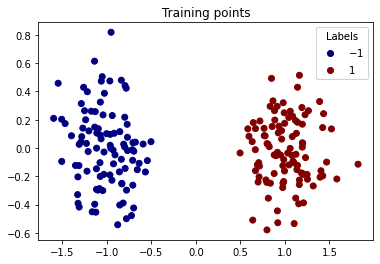

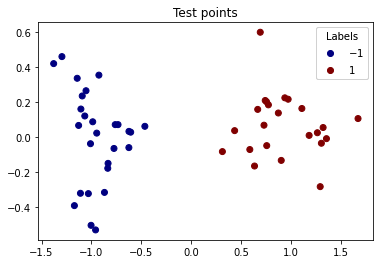

In [ ]:
plot_dataset(X_train,y_train,"Training points")
plot_dataset(X_test,y_test,"Test points")

## Experiment 1

### Perceptron

In [ ]:
#Perceptron definition
def preceptron(X_train, y_train, NB_INPUT, NB_ITERATIONS):
  w = w_old = np.zeros((NB_INPUT+1,NB_ITERATIONS))
  t=0
  for t in range(1,NB_ITERATIONS):
    w_old =w[:,t-1]
    for xi, yi in zip(X_train, y_train):
      xi = np.insert(xi, 0, 1)
      if np.dot(w[:,t],np.transpose(xi))*yi <=0:
        w[:,t] = w[:,t] + np.dot(yi,xi)
    if np.array_equal(w[:,t], w_old):
      return w[:,t]
  return w[:,t]

In [ ]:
NB_INPUT = X.shape[1]
NB_ITERATIONS = 100
weights = preceptron(X_train, y_train, NB_INPUT, NB_ITERATIONS)
print("FINAL WEIGHTS : ",weights)

FINAL WEIGHTS :  [ 0.          1.92363184 -0.37345165]


### Question 1: Does the algorithm converges? Why?
=>Answer : Yes. Because the two classes are separable


###Question 2: Plot the decision boundary found by your algorithm. Is this decision boundary unique? Does changing the initialisation changes the result of the algorithm?


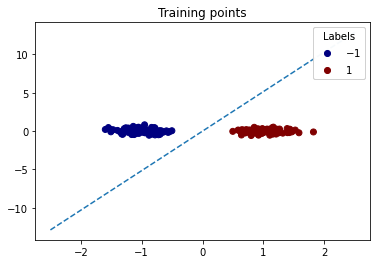

In [ ]:
plot_dataset(X_train,y_train,"Training points",weights=weights,show_boundry=True)

=>Answer : No, the decision boundary is not unique, it dependents on the initialization of the weights.

###Question 3: Compute the accuracy of the classification on the test set. Plot the decision boundary on the test set.
=>Answer : the accuracy is 100%

In [ ]:
# Calculate accuracy percentage
def accuracy_metric(X_test, y_test, w):
  s = 0
  for xi, yi in zip(X_test, y_test):
    xi = np.insert(xi, 0, 1)
    if np.dot(w,np.transpose(xi))*yi >0:
      s += 1
  return s / float(len(y_test)) * 100.0
print(accuracy_metric(X_test, y_test, weights) , '%')


100.0 %


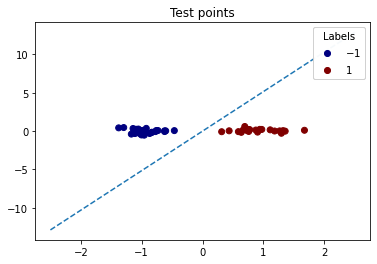

In [ ]:
plot_dataset(X_test,y_test,"Test points",weights=weights,show_boundry=True)

## Experiment 2


In [ ]:
sigma1= sigma2= 0.75
X = generate_data(mu1,mu2,sigma1,sigma2,NB_POINTS,input_size)
print("X.shape",X.shape)

X.shape (250, 2)


In [ ]:
#SPLIT AND SHUFFLE
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42,shuffle=True)
print("X_train.shape",X_train.shape,"y_train.shape",y_train.shape)

X_train.shape (200, 2) y_train.shape (200,)


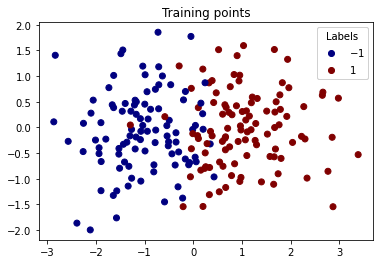

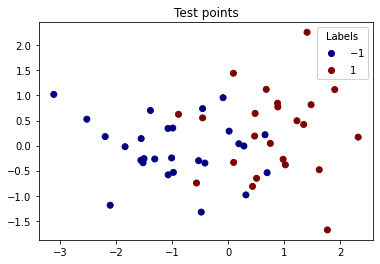

In [ ]:
plot_dataset(X_train,y_train,"Training points")
plot_dataset(X_test,y_test,"Test points")

In [ ]:
NB_INPUT = X.shape[1]
NB_ITERATIONS = 10
weights = preceptron(X_train, y_train, 2, NB_ITERATIONS)
print(weights)

[-1.          2.61270571 -0.90406935]


### Question 1: Does the algorithm converges? Why?
=>Answer : No. Because the two classes are not separable


###Question 2: Plot the decision boundary found by your algorithm. Is this decision boundary unique? Does changing the initialisation changes the result of the algorithm?


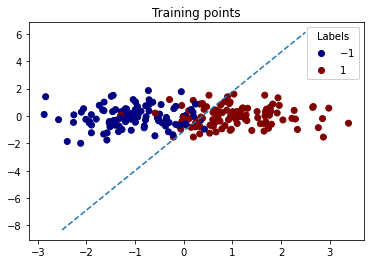

In [ ]:
plot_dataset(X_train,y_train,"Training points",weights=weights,show_boundry=True)

=>Answer : No, the decision boundary is not unique. No, changing the initialisation changes the result of the algorithm because it does not converge.

###Question 3: Compute the accuracy of the classification on the test set. Plot the decision boundary on the test set.


In [ ]:
print(accuracy_metric(X_test, y_test, weights) , '%')

80.0 %


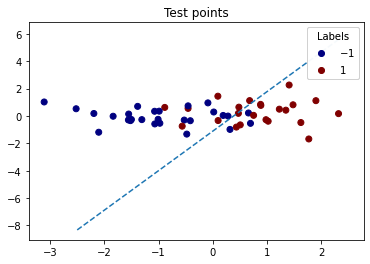

In [ ]:
plot_dataset(X_test,y_test,"Test points",weights=weights,show_boundry=True)

On the previous experiences :
the more the variance increases the more the error.As a result, the probability to have outliers increases. 

## Experiment 3

In [ ]:
def calculate_error(X_test, y_test,weights):
  e=0
  for xi, yi in zip(X_test, y_test):
    xi = np.insert(xi, 0, 1)
    if np.dot(weights,np.transpose(xi))*yi <=0:
      e+=1
  return e /float(len(y_test))

Text(0.5, 1.0, 'ERRORS')

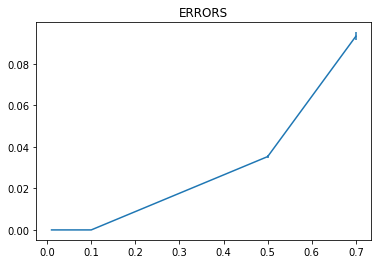

In [ ]:
NB_INPUT = X.shape[1]
sigmas = [0.01, 0.1, 0.5, 0.7]
NB_ITERATIONS = 30
vars=[]
means=[]
erreur=[]
for i in range(len(sigmas)):
  e=[]
  for j in range(NB_ITERATIONS):
    X = generate_data(mu1,mu2,sigmas[i],sigmas[i],NB_POINTS,input_size)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42,shuffle=True)
    weights = preceptron(X_train, y_train, NB_INPUT, 100)
    e.append(calculate_error(X_test, y_test,weights))
  erreur.append(e)
  vars.append(np.var(erreur[i]))
  means.append(np.mean(erreur[i]))
plt.figure()
plt.errorbar(sigmas,means,yerr=vars)
plt.title("ERRORS")

###Comment the result.
We notice that by increasing the value of sigma1 and sigma2 the error becomes bigger so the curve which represents the variation of sigma according to the average of the error is increasing.
Also The value of the variance of the error increases by increasing sigma.